# Project I

## **Forecasting Multivariate**

## Prediksi Kebutuhan Energi Panel Surya



*   Nama : Zulfa Lailatul Mu'achirin
*   Nim : 220411100147
*   Matkul : PSD D

## Pendahuluan

### Latar Belakang

Dengan semakin mendesaknya tantangan perubahan iklim dan kebutuhan akan sumber energi berkelanjutan, tenaga surya kini memiliki peran yang sangat penting dalam memenuhi kebutuhan energi global. Dalam konteks ini, muncul peluang besar untuk mengatasi masalah bisnis yang relevan: mengoptimalkan performa dan efisiensi pembangkit listrik tenaga surya agar dapat memaksimalkan produksi energi dan berkontribusi pada masa depan yang lebih bersih dan berkelanjutan.

### Rumusan Masalah

Bagaimana membangun model prediksi yang akurat untuk memproyeksikan daya listrik yang dihasilkan (AC Power) oleh pembangkit listrik tenaga surya pada interval 15 menit ke depan, dengan mempertimbangkan pola harian, faktor cuaca, serta kinerja inverter secara individu dan agregat, untuk mendukung perencanaan operasional yang lebih efisien dan pengelolaan energi yang optimal?

### Tujuan

Menggunakan data pembangkitan tenaga surya dan suhu terkait untuk mengeksplorasi peramalan deret waktu (time series forecasting) serta membangun model prediksi jangka pendek untuk tenaga surya.

### Bussines Understanding

Dalam era transisi menuju energi terbarukan, pembangkit listrik tenaga surya memiliki peran strategis untuk memenuhi kebutuhan energi yang bersih dan berkelanjutan. Namun, performa pembangkit sering kali dipengaruhi oleh berbagai faktor seperti kondisi cuaca, suhu modul, dan efisiensi operasional. Dengan memanfaatkan data pembangkitan energi dan informasi cuaca, proyek ini bertujuan untuk memahami pola produksi energi dan mengembangkan model prediksi jangka pendek yang dapat membantu meningkatkan efisiensi pembangkit. Melalui analisis ini, pembangkit dapat mengoptimalkan perencanaan produksi, memaksimalkan hasil energi, dan meningkatkan kontribusi terhadap sistem energi bersih secara global. Langkah ini diharapkan tidak hanya mendukung keberlanjutan operasional pembangkit, tetapi juga mendorong pengelolaan energi yang lebih efektif di masa depan.

### Data Understanding


Data ini diambil dari Pembangkit listrik selama 34 hari, dengan interval pencatatan setiap 15 menit. Dataset ini terdiri dari dua pasang file untuk setiap pembangkit. Setiap pasangan mencakup data pembangkitan energi dan data pembacaan sensor. Data pembangkitan energi berfokus pada tingkat inverter, pusat proses konversi energi, sementara data pembacaan sensor mencerminkan konteks lingkungan yang lebih luas di tingkat pembangkit, yang memengaruhi keluaran energi surya. Data didapat dari Kaggle https://www.kaggle.com/code/vinayjshetty/solar-power-generation-forecast-using-different-ml. Kali ini kita akan menggunakan data 1.

Dataset pembangkitan energi mencatat detail mendalam tentang energi yang dihasilkan oleh inverter individual setiap 15 menit. Melalui metrik seperti DC_POWER dan AC_POWER, kita dapat memahami proses konversi energi dari arus searah (DC) ke arus bolak-balik (AC). Selain itu, metrik kumulatif seperti DAILY_YIELD dan TOTAL_YIELD memberikan gambaran tentang produksi energi yang berkelanjutan selama periode waktu tertentu. Sebaliknya, dataset pembacaan sensor menangkap kondisi lingkungan di tingkat pembangkit secara holistik. Dengan menganalisis parameter seperti AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, dan IRRADIATION, kita dapat memahami faktor lingkungan yang memengaruhi efisiensi konversi energi. Data ini menjadi bagian penting untuk memahami hubungan antara panel surya, kondisi sekitarnya, dan iklim secara keseluruhan.

### Library yang digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Additional libraries added for project:
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing
from sklearn.impute import KNNImputer

#Model selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

#ML
from xgboost import XGBRegressor

#DL
#import tensorflow as tf

#other
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore');

### Membaca data

Data Pembangkit Listrik 1

In [3]:
df_plt1_gen = pd.read_csv('/content/drive/MyDrive/kuliah sem 5/MyData/Plant_1_Generation_Data.csv')

df_plt1_gen.sample(10, random_state=1)

DATE_TIME  PLANT_ID       SOURCE_KEY     DC_POWER    AC_POWER  \
32384  31-05-2020 15:30   4135001  pkci93gMrogZuBj  3142.571429  308.771429   
58525  13-06-2020 02:45   4135001  zVJPv84UY57bAof     0.000000    0.000000   
26110  28-05-2020 07:45   4135001  McdE0feGgRqW7Ca  4259.857143  418.400000   
17618  24-05-2020 05:30   4135001  WRmjgnKYAwPKWDb     0.000000    0.000000   
3631   16-05-2020 21:00   4135001  YxYtjZvoooNbGkE     0.000000    0.000000   
39654  04-06-2020 02:45   4135001  WRmjgnKYAwPKWDb     0.000000    0.000000   
22786  26-05-2020 16:45   4135001  iCRJl6heRkivqQ3  6204.142857  607.871429   
43162  05-06-2020 19:30   4135001  zBIq5rxdHJRwDNY     0.000000    0.000000   
11802  21-05-2020 08:00   4135001  WRmjgnKYAwPKWDb  5096.400000  499.640000   
52279  10-06-2020 04:00   4135001  1IF53ai7Xc0U56Y     0.000000    0.000000   

       DAILY_YIELD  TOTAL_YIELD  
32384  5405.285714  7294281.286  
58525     0.000000  7328550.000  
26110   308.142857  7256697.143  
17618     0.000000  7093026.000  
3631   6475.000000  7192732.000  
39654     0.000000  7174627.000  
22786  7617.571429  7267747.571  
43162  7723.000000  6500302.000  
11802   405.000000  7070130.000  
52279     0.000000  6380022.000

PLANT_ID bernilai sama di seluruh data, sehingga dapat dihapus tanpa masalah. Nilai generation adalah 0 pada malam hari, yang tentu saja masuk akal untuk tenaga surya. Kemudian kita akan mengganti nama kolom menjadi inverters/inverter agar lebih mudah.

Inverter dalam konteks pembangkit listrik tenaga surya adalah perangkat yang berfungsi untuk mengonversi listrik arus searah (DC - Direct Current) yang dihasilkan oleh panel surya menjadi listrik arus bolak-balik (AC - Alternating Current). Setiap inverter biasanya terhubung ke sejumlah panel surya, dan performanya menjadi indikator penting dalam menganalisis efisiensi sistem pembangkit secara keseluruhan.

In [4]:
#Since we're focusing on plant 1 for now we'll shorten the name
df_gen = df_plt1_gen.drop('PLANT_ID', axis=1)

df_gen['INVERTER'] = df_gen.SOURCE_KEY.map({df_gen.SOURCE_KEY.unique()[i-1]: \
                                            f'INVERTER_{i}' for i in range(1, \
                                            len(df_gen.SOURCE_KEY.unique()) +1)})
df_gen = df_gen.drop('SOURCE_KEY', axis=1)
inverters = df_gen.INVERTER.unique()
inverters

array(['INVERTER_1', 'INVERTER_2', 'INVERTER_3', 'INVERTER_4',
       'INVERTER_5', 'INVERTER_6', 'INVERTER_7', 'INVERTER_8',
       'INVERTER_9', 'INVERTER_10', 'INVERTER_11', 'INVERTER_12',
       'INVERTER_13', 'INVERTER_14', 'INVERTER_15', 'INVERTER_16',
       'INVERTER_17', 'INVERTER_18', 'INVERTER_19', 'INVERTER_20',
       'INVERTER_21', 'INVERTER_22'], dtype=object)

In [5]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   DC_POWER     68778 non-null  float64
 2   AC_POWER     68778 non-null  float64
 3   DAILY_YIELD  68778 non-null  float64
 4   TOTAL_YIELD  68778 non-null  float64
 5   INVERTER     68778 non-null  object 
dtypes: float64(4), object(2)
memory usage: 3.1+ MB


In [6]:
df_gen.describe(include='all').T

count unique               top  freq            mean  \
DATE_TIME      68778   3158  01-06-2020 12:45    22             NaN   
DC_POWER     68778.0    NaN               NaN   NaN     3147.426211   
AC_POWER     68778.0    NaN               NaN   NaN      307.802752   
DAILY_YIELD  68778.0    NaN               NaN   NaN     3295.968737   
TOTAL_YIELD  68778.0    NaN               NaN   NaN  6978711.760671   
INVERTER       68778     22       INVERTER_11  3155             NaN   

                       std        min            25%          50%  \
DATE_TIME              NaN        NaN            NaN          NaN   
DC_POWER       4036.457169        0.0            0.0        429.0   
AC_POWER        394.396439        0.0            0.0     41.49375   
DAILY_YIELD    3145.178309        0.0            0.0  2658.714286   
TOTAL_YIELD  416271.982856  6183645.0  6512002.53575    7146685.0   
INVERTER               NaN        NaN            NaN          NaN   

                       75%        max  
DATE_TIME              NaN        NaN  
DC_POWER       6366.964286  14471.125  
AC_POWER         623.61875    1410.95  
DAILY_YIELD         6274.0     9163.0  
TOTAL_YIELD  7268705.90625  7846821.0  
INVERTER               NaN        NaN

In [7]:
df_gen.groupby('INVERTER').count().DATE_TIME.sort_values()

INVERTER
INVERTER_22    3104
INVERTER_7     3118
INVERTER_3     3118
INVERTER_10    3119
INVERTER_2     3119
INVERTER_20    3119
INVERTER_9     3123
INVERTER_5     3124
INVERTER_15    3124
INVERTER_16    3124
INVERTER_21    3124
INVERTER_12    3125
INVERTER_14    3125
INVERTER_17    3125
INVERTER_19    3126
INVERTER_18    3126
INVERTER_13    3130
INVERTER_8     3130
INVERTER_4     3133
INVERTER_6     3133
INVERTER_1     3154
INVERTER_11    3155
Name: DATE_TIME, dtype: int64

Tipe data (*dtypes*) sudah sesuai, tetapi kita perlu mengubah kolom **DATE_TIME** menjadi objek datetime agar lebih mudah dianalisis. Tidak ada nilai kosong (*null*) yang terdeteksi, namun terlihat ada beberapa data yang hilang.  

Di tingkat pembangkit, kita seharusnya memiliki 3264 timestamp unik (34 hari x 24 jam x 4 interval 15 menit per jam), tetapi hanya ada 3158 timestamp. Sedangkan, untuk semua inverter, kita seharusnya memiliki 71808 baris data (3264 x 22 inverter), tetapi yang tersedia hanya 68778 baris. Jadi, sekitar 3000 atau sekitar 4% dari total timestamp yang diharapkan hilang. Ada juga variasi di setiap inverter mengenai timestamp yang hilang, seperti yang terlihat dari jumlah baris inverter di atas.

In [8]:
df_gen['DATE_TIME'] = pd.to_datetime(df_gen.DATE_TIME, format='%d-%m-%Y %H:%M')
df_gen.dtypes

DATE_TIME      datetime64[ns]
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
INVERTER               object
dtype: object

Data sensor cuaca 1

In [9]:
df_plt1_weather = pd.read_csv('/content/drive/MyDrive/kuliah sem 5/MyData/Plant_1_Weather_Sensor_Data.csv')

df_plt1_weather.sample(10, random_state=1)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
1194  2020-05-28 02:30:00   4135001  HmiyD2TTLFNqkNe            22.398088   
2385  2020-06-09 16:45:00   4135001  HmiyD2TTLFNqkNe            29.618705   
99    2020-05-16 03:30:00   4135001  HmiyD2TTLFNqkNe            21.731421   
2779  2020-06-13 19:15:00   4135001  HmiyD2TTLFNqkNe            24.000767   
13    2020-05-15 03:15:00   4135001  HmiyD2TTLFNqkNe            24.985215   
2304  2020-06-08 20:30:00   4135001  HmiyD2TTLFNqkNe            24.091545   
442   2020-05-19 18:00:00   4135001  HmiyD2TTLFNqkNe            25.046377   
2847  2020-06-14 12:15:00   4135001  HmiyD2TTLFNqkNe            24.932560   
45    2020-05-15 11:15:00   4135001  HmiyD2TTLFNqkNe            30.216062   
705   2020-05-22 22:45:00   4135001  HmiyD2TTLFNqkNe            23.214526   

      MODULE_TEMPERATURE  IRRADIATION  
1194           20.536780     0.000000  
2385           37.964126     0.302090  
99             20.351884     0.000000  
2779           21.948254     0.000000  
13             24.351508     0.000000  
2304           20.824284     0.000000  
442            25.426198     0.001575  
2847           36.606858     0.472765  
45             50.006989     0.585787  
705            21.719092     0.000000

In [10]:
df_plt1_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [11]:
df_plt1_weather.describe(include='all').T

count unique                  top  freq       mean  \
DATE_TIME              3182   3182  2020-05-15 00:00:00     1        NaN   
PLANT_ID             3182.0    NaN                  NaN   NaN  4135001.0   
SOURCE_KEY             3182      1      HmiyD2TTLFNqkNe  3182        NaN   
AMBIENT_TEMPERATURE  3182.0    NaN                  NaN   NaN  25.531606   
MODULE_TEMPERATURE   3182.0    NaN                  NaN   NaN  31.091015   
IRRADIATION          3182.0    NaN                  NaN   NaN   0.228313   

                           std        min        25%        50%        75%  \
DATE_TIME                  NaN        NaN        NaN        NaN        NaN   
PLANT_ID                   0.0  4135001.0  4135001.0  4135001.0  4135001.0   
SOURCE_KEY                 NaN        NaN        NaN        NaN        NaN   
AMBIENT_TEMPERATURE   3.354856  20.398505  22.705182  24.613814  27.920532   
MODULE_TEMPERATURE   12.261222  18.140415  21.090553   24.61806   41.30784   
IRRADIATION           0.300836        0.0        0.0   0.024653   0.449588   

                           max  
DATE_TIME                  NaN  
PLANT_ID             4135001.0  
SOURCE_KEY                 NaN  
AMBIENT_TEMPERATURE  35.252486  
MODULE_TEMPERATURE   65.545714  
IRRADIATION           1.221652

Kita bisa menghapus kolom **PLANT_ID** dan **SOURCE_KEY** karena nilainya sama di seluruh data. Dan kita ubah kolom **DATE_TIME** menjadi objek datetime agar lebih mudah digunakan dalam analisis. Berdasarkan jumlah **DATE_TIME**, kita juga bisa melihat bahwa ada beberapa data cuaca yang hilang.

In [12]:
df_weather = df_plt1_weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_weather['DATE_TIME'] = pd.to_datetime(df_weather.DATE_TIME, format='%Y-%m-%d %H:%M:%S')

Untuk mengisi **datetime** yang hilang pada dataset pembangkitan dan sensor cuaca, kita akan membuat objek datetime dengan rentang waktu penuh yang diharapkan.

In [13]:
datetimes_full = pd.Series(pd.date_range(df_gen.DATE_TIME.min(),
                                         df_gen.DATE_TIME.max(),
                                         freq='15min'),
                           name='DATE_TIME')
datetimes_full

0      2020-05-15 00:00:00
1      2020-05-15 00:15:00
2      2020-05-15 00:30:00
3      2020-05-15 00:45:00
4      2020-05-15 01:00:00
               ...        
3259   2020-06-17 22:45:00
3260   2020-06-17 23:00:00
3261   2020-06-17 23:15:00
3262   2020-06-17 23:30:00
3263   2020-06-17 23:45:00
Name: DATE_TIME, Length: 3264, dtype: datetime64[ns]

### Menggabungkan data

Sekarang kita siap untuk menggabungkan ini dengan dataset kita. Dimulai dengan dataset pembangkitan: karena setiap inverter memiliki beberapa **datetime** yang hilang, kita perlu melakukannya satu inverter pada satu waktu, kemudian menggabungkan hasilnya kembali menjadi satu dataset.

In [14]:
dfs_gen = []
for i in inverters:
    df_inverter = df_gen[df_gen.INVERTER == i]
    df_inverter = df_inverter.merge(datetimes_full, on='DATE_TIME', how='right')
    df_inverter['INVERTER'] = i
    dfs_gen.append(df_inverter)
df_gen = pd.concat(dfs_gen)
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71808 entries, 0 to 3263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    71808 non-null  datetime64[ns]
 1   DC_POWER     68778 non-null  float64       
 2   AC_POWER     68778 non-null  float64       
 3   DAILY_YIELD  68778 non-null  float64       
 4   TOTAL_YIELD  68778 non-null  float64       
 5   INVERTER     71808 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
df = df_gen.merge(df_weather, on='DATE_TIME', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            71808 non-null  datetime64[ns]
 1   DC_POWER             68778 non-null  float64       
 2   AC_POWER             68778 non-null  float64       
 3   DAILY_YIELD          68778 non-null  float64       
 4   TOTAL_YIELD          68778 non-null  float64       
 5   INVERTER             71808 non-null  object        
 6   AMBIENT_TEMPERATURE  70004 non-null  float64       
 7   MODULE_TEMPERATURE   70004 non-null  float64       
 8   IRRADIATION          70004 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.9+ MB


### Eksplorasi Data

Untuk memulai analisis yang lebih mendalam, kita akan membuat beberapa fitur dasar dari **datetime**. Jika kita melakukan pemodelan untuk periode sepanjang tahun atau lebih lama, informasi seperti bulan dan tahun bisa menjadi penting untuk menangkap variasi musiman dan tren jangka panjang. Namun, karena data kita hanya mencakup 34 hari, kita akan mengabaikan fitur tersebut. Sebagai gantinya, kita dapat menggunakan fitur **dayofyear** untuk menangkap tren jangka panjang yang mungkin ada selama periode tersebut.

In [16]:
df['HOUR'] = df.DATE_TIME.dt.hour
df['DAY'] = df.DATE_TIME.dt.dayofyear
df['DAY_WEEK'] = df.DATE_TIME.dt.dayofweek
df['MINUTES_15'] = df.DATE_TIME.dt.time

#This maps the 15 minute intervals over the course of the day to ints 1-96.
df['MINUTES_15'] = df.MINUTES_15.map({df.MINUTES_15.unique()[i-1]:i for i in range(1, 97)})
#Change day of year to day of data
df['DAY'] = df.DAY.map({df.DAY.unique()[i-1]:i for i in range(1, 35)})

Kita cek korelasi yang linier pada setiap fitur

In [17]:
corr = df.corr(numeric_only=True)
corr

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999996     0.082284     0.003815   
AC_POWER             0.999996  1.000000     0.082234     0.003804   
DAILY_YIELD          0.082284  0.082234     1.000000     0.009867   
TOTAL_YIELD          0.003815  0.003804     0.009867     1.000000   
AMBIENT_TEMPERATURE  0.724668  0.724903     0.478496    -0.036150   
MODULE_TEMPERATURE   0.954811  0.954924     0.198308    -0.015596   
IRRADIATION          0.989391  0.989340     0.078317    -0.005490   
HOUR                 0.024104  0.024101     0.836124     0.004988   
DAY                 -0.030539 -0.030471    -0.003013     0.172868   
DAY_WEEK             0.017649  0.017640     0.027167    -0.018183   
MINUTES_15           0.024131  0.024127     0.836208     0.004991   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
DC_POWER                        0.724668            0.954811     0.989391   
AC_POWER                        0.724903            0.954924     0.989340   
DAILY_YIELD                     0.478496            0.198308     0.078317   
TOTAL_YIELD                    -0.036150           -0.015596    -0.005490   
AMBIENT_TEMPERATURE             1.000000            0.853778     0.722999   
MODULE_TEMPERATURE              0.853778            1.000000     0.961566   
IRRADIATION                     0.722999            0.961566     1.000000   
HOUR                            0.322279            0.102791     0.015804   
DAY                            -0.220491           -0.092644    -0.030397   
DAY_WEEK                        0.056732            0.035057     0.021267   
MINUTES_15                      0.321951            0.102607     0.015799   

                             HOUR           DAY      DAY_WEEK    MINUTES_15  
DC_POWER             2.410437e-02 -3.053931e-02  1.764947e-02  2.413064e-02  
AC_POWER             2.410128e-02 -3.047131e-02  1.764008e-02  2.412678e-02  
DAILY_YIELD          8.361242e-01 -3.013040e-03  2.716671e-02  8.362076e-01  
TOTAL_YIELD          4.988189e-03  1.728681e-01 -1.818331e-02  4.990603e-03  
AMBIENT_TEMPERATURE  3.222789e-01 -2.204906e-01  5.673201e-02  3.219509e-01  
MODULE_TEMPERATURE   1.027911e-01 -9.264400e-02  3.505704e-02  1.026066e-01  
IRRADIATION          1.580428e-02 -3.039712e-02  2.126718e-02  1.579879e-02  
HOUR                 1.000000e+00  2.607124e-16 -2.829067e-17  9.991858e-01  
DAY                  2.607124e-16  1.000000e+00 -1.034175e-01  9.708847e-17  
DAY_WEEK            -2.829067e-17 -1.034175e-01  1.000000e+00  6.468614e-18  
MINUTES_15           9.991858e-01  9.708847e-17  6.468614e-18  1.000000e+00

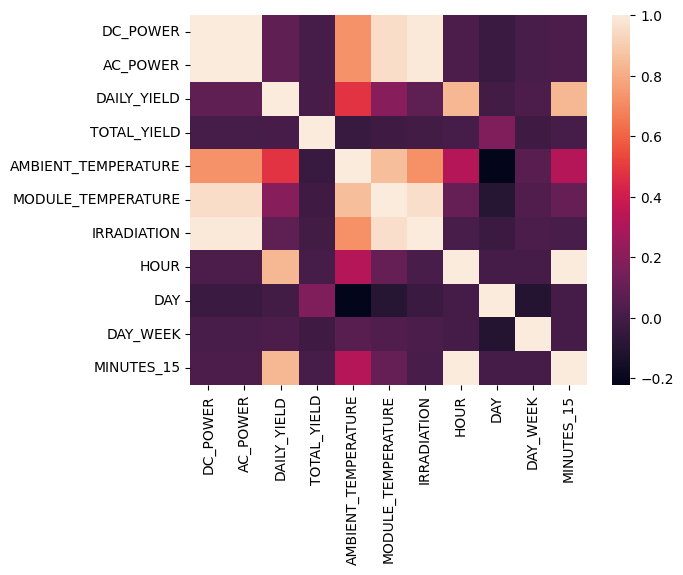

In [18]:
sns.heatmap(corr);

Korelasi yang tinggi antara DC dan AC power menunjukkan bahwa inverter bekerja dengan baik untuk mengubah energi dari bentuk DC ke AC. Kita akan menggunakan AC_POWER sebagai target dalam analisis. Ada hubungan yang jelas antara jam dalam sehari (HOUR) dan hasil energi harian (DAILY_YIELD), yang makin meningkat seiring berjalannya waktu. Untuk data cuaca, IRRADIATION dan MODULE_TEMPERATURE memiliki korelasi yang kuat dengan AC_POWER. Selanjutnya, kita akan membuat grafik pairplot untuk memvisualisasikan hubungan-hubungan ini dan mencari apakah ada korelasi yang tidak linear.

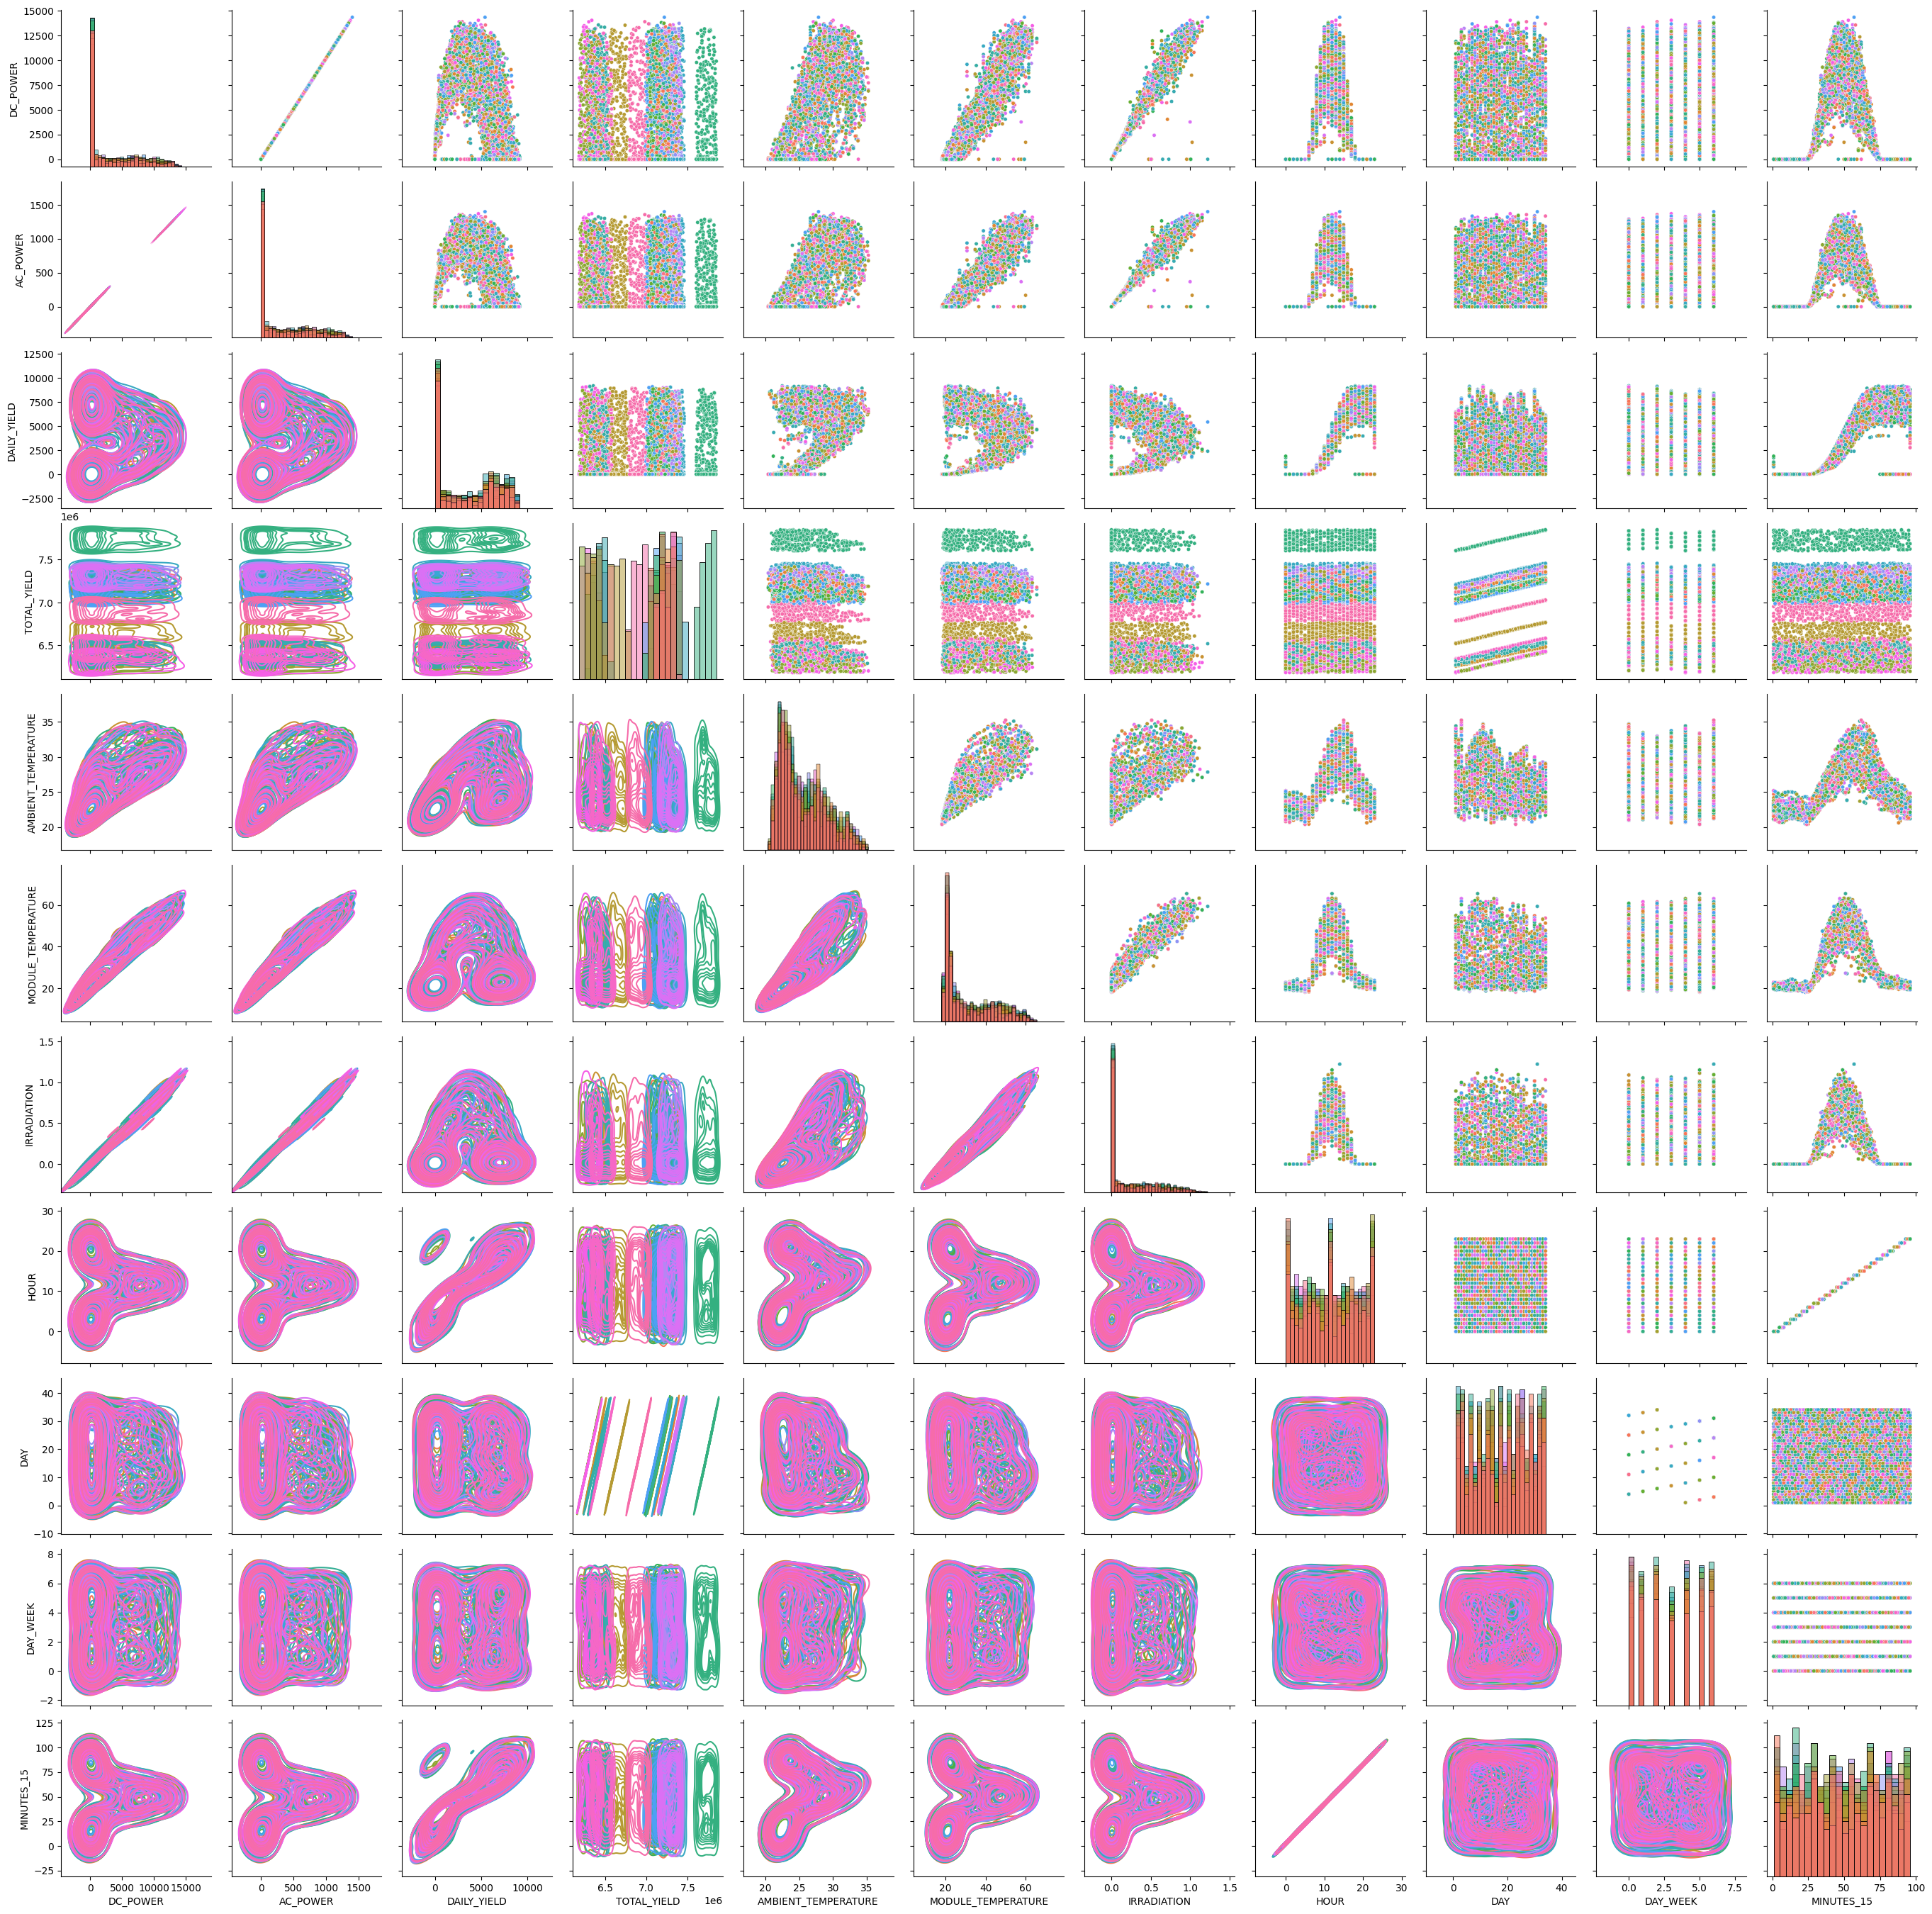

In [19]:
g = sns.PairGrid(df.sample(10000, random_state=1), diag_sharey=False, hue='INVERTER')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot);

**Penjelasan:**  
- **Zero values pada AC_POWER, DC_POWER, dan DAILY_YIELD** terjadi karena pada malam hari pembangkit tidak menghasilkan energi, yang normal untuk sistem tenaga surya.
- **Missing data** dapat terlihat dari hubungan **DAY** dan **MINUTES_15**, yang mengindikasikan ada data yang hilang pada beberapa waktu.
- **Perbedaan kapasitas inverter** menunjukkan bahwa beberapa inverter menghasilkan lebih banyak energi daripada yang lain, yang bisa disebabkan oleh faktor seperti umur inverter, lokasi, atau pemeliharaan.
- Hubungan antara **HOUR** dan **AC_POWER** menunjukkan puncak pembangkit di siang hari, yang sesuai dengan ekspektasi bahwa produksi energi surya lebih tinggi pada siang hari.


## Outlier

Pertama, lakukan pemeriksaan cepat untuk melihat apakah ada angka daya negatif.

In [20]:
df[['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].any() < 0

AC_POWER       False
DC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

Mari kita jelajahi target kita, **AC_POWER**. Kita dapat mendefinisikan **outlier** sebagai nilai yang lebih kecil dari persentil ke-1 atau lebih besar dari persentil ke-99. Untuk melakukan ini, kita akan membuat empat fitur kuantil: dua di antaranya berada dalam rentang **outlier** dan dua lainnya untuk menetapkan satu deviasi standar dari rata-rata. Setelah itu, kita bisa memplot hasilnya.

In [21]:
#Making a new dataframe for EDA since we won't necessarily want these features for our model.
df_eda = df.copy()
df_eda = df_eda.merge(df_eda.groupby('MINUTES_15')\
                      .quantile(0.01, numeric_only=True)\
                      .AC_POWER.rename('OUTLIERS_LOW_AC_POWER'),
                      on='MINUTES_15',
                      how='left')
df_eda = df_eda.merge(df_eda.groupby('MINUTES_15')\
                      .quantile(0.99, numeric_only=True)\
                      .AC_POWER.rename('OUTLIERS_HIGH_AC_POWER'),
                      on='MINUTES_15',
                      how='left')
df_eda = df_eda.merge(df_eda.groupby('MINUTES_15')\
                      .mean(numeric_only=True)\
                      .AC_POWER.rename('MEAN'),
                       on='MINUTES_15',
                       how='left')
df_eda = df_eda.merge(df_eda.groupby('MINUTES_15')\
                      .std(numeric_only=True)\
                      .AC_POWER\
                      .rename('STD'),
                      on='MINUTES_15',
                      how='left')
df_eda['STD_1'] = df_eda.query('AC_POWER < (MEAN + STD) and AC_POWER > (MEAN - STD)').AC_POWER

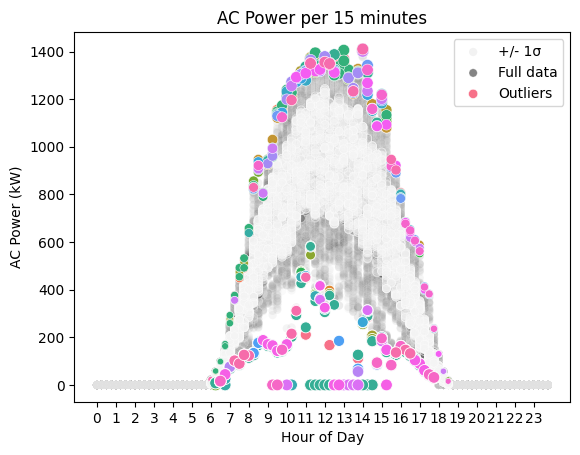

In [22]:
#Since we have nulls in our data now we will exclude those with df[~df.isna()]
fig, ax = plt.subplots()
sns.color_palette("Paired")
sns.scatterplot(data=df_eda[~df_eda.isna()],
                y='AC_POWER', x='MINUTES_15',
                hue='INVERTER', palette='gray', alpha=0.05, legend=False)
sns.scatterplot(data=df_eda[~df_eda.isna()],
                y='STD_1', x='MINUTES_15',
                hue='INVERTER', palette='gray', alpha =0.5, legend=False)
sns.scatterplot(data=df_eda[~df_eda.isna()].query('AC_POWER > OUTLIERS_HIGH_AC_POWER'),
                y='AC_POWER', x='MINUTES_15',
                hue='INVERTER', size='AC_POWER')
sns.scatterplot(data=df_eda[~df_eda.isna()].query('AC_POWER < OUTLIERS_LOW_AC_POWER'),
                y='AC_POWER', x='MINUTES_15',
                hue='INVERTER', size= -df_eda[~df_eda.isna()].AC_POWER)

plt.title('AC Power per 15 minutes')
plt.ylabel('AC Power (kW)')
plt.xlabel('Hour of Day')
ax.set_xticks([i for i in range(1, 97, 4)])
ax.set_xticklabels([i for i in range(24)])
ax.legend(['+/- 1\u03C3','Full data', 'Outliers']);

tampaknya ada beberapa kejadian di mana daya yang dihasilkan pada tengah hari adalah 0. Ini bisa menunjukkan adanya data yang buruk, inverter yang rusak, perawatan yang dijadwalkan, hari yang berawan, hari cerah di mana pembangkit sudah mencapai kapasitas maksimal, atau berbagai kemungkinan lainnya. Tanpa pengetahuan lebih dalam tentang domain ini, sulit untuk memastikan penyebab pastinya, namun mari kita coba mencari pola dari outliers di tengah hari tersebut.

Pertama, kita akan memeriksa apakah ada inverter tertentu yang bertanggung jawab atas masalah ini.

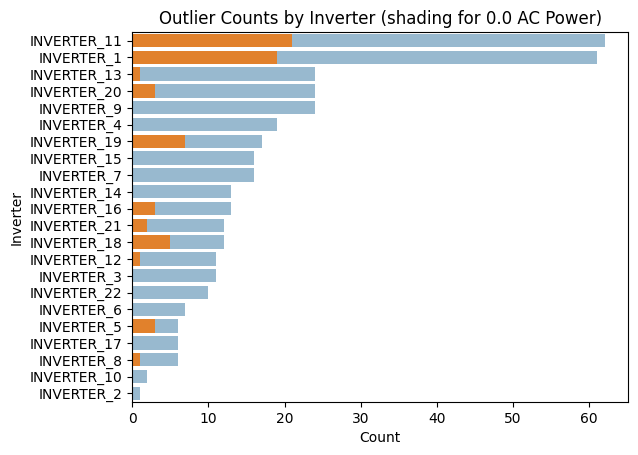

In [23]:
outliers_low = df_eda[~df_eda.isna()].query('AC_POWER < OUTLIERS_LOW_AC_POWER')
outliers_high = df_eda[~df_eda.isna()].query('AC_POWER > OUTLIERS_HIGH_AC_POWER')

outliers_source_low = outliers_low.groupby('INVERTER')\
                                  .count()\
                                  .DATE_TIME\
                                  .reset_index()\
                                  .sort_values('DATE_TIME', ascending=False)
outliers_source_low_zero = outliers_low[outliers_low.AC_POWER == 0].groupby('INVERTER')\
                                                    .count()\
                                                    .DATE_TIME\
                                                    .reset_index()\
                                                    .sort_values('DATE_TIME', ascending=False)
fig, ax = plt.subplots()
sns.barplot(data = outliers_source_low,
            y='INVERTER', x='DATE_TIME',
            alpha = 0.5, )
sns.barplot(data = outliers_source_low_zero,
            y='INVERTER', x='DATE_TIME')
plt.title('Outlier Counts by Inverter (shading for 0.0 AC Power)')
plt.ylabel('Inverter')
plt.xlabel('Count');

Sebaran jumlah **outlier**, termasuk pengukuran **AC_POWER** yang bernilai 0.0, terkonsentrasi pada inverter 11 dan 1. Kemungkinan besar, inverter-inverter ini mati untuk jangka waktu yang lama karena pemeliharaan atau kerusakan. Di bawah ini, kita akan melihat sebaran **outlier** tersebut selama 34 hari penuh untuk melihat apakah ada pola yang teratur.

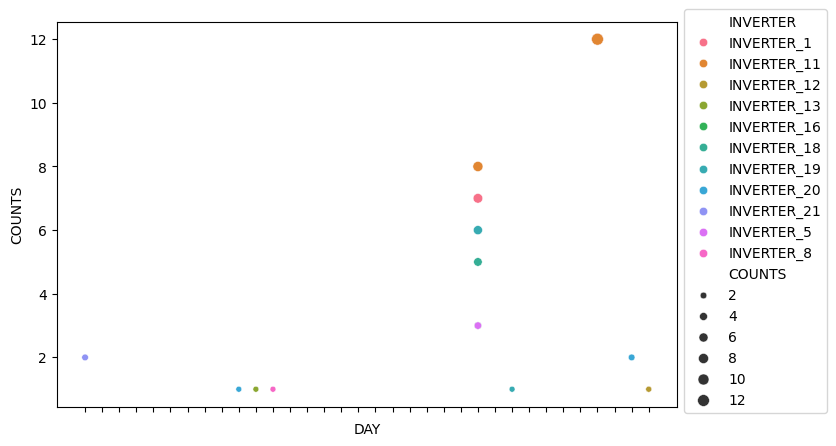

In [24]:
outliers_zero_count = outliers_low[outliers_low.AC_POWER == 0].groupby(['INVERTER','DAY'])\
                                                              .count()\
                                                              .rename(columns={'AC_POWER':'COUNTS'})\
                                                              .COUNTS\
                                                              .reset_index()
outliers_zero_count
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=outliers_zero_count,
                x='DAY', y='COUNTS',
                hue='INVERTER', size='COUNTS', legend='brief')
ax.legend(bbox_to_anchor=(1, 1.05))
ax.set_xticks([i for i in range(1,35)]);
ax.set_xticklabels([]);

Beberapa outlier terjadi pada hari yang sama. Mungkin ada pemeliharaan pada hari tersebut atau masalah lainnya. Sekarang, mari kita periksa apakah ada pola mingguan.

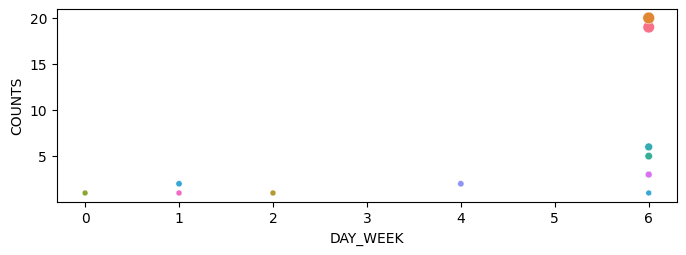

In [25]:
outliers_zero_count = outliers_low[outliers_low.AC_POWER == 0].groupby(['INVERTER','DAY_WEEK'])\
                                                              .count()\
                                                              .rename(columns={'AC_POWER':'COUNTS'})\
                                                              .COUNTS\
                                                              .reset_index()
outliers_zero_count
fig, ax = plt.subplots(figsize=(8,2.5))
sns.scatterplot(data=outliers_zero_count,
                x='DAY_WEEK', y='COUNTS',
                hue='INVERTER', size='COUNTS', legend=False);

Beberapa nilai nol terjadi pada hari Minggu. Ini bisa jadi kebetulan, atau mungkin menunjukkan adanya pemeliharaan yang dijadwalkan. Karena Minggu kemungkinan adalah hari dengan permintaan yang lebih rendah di jaringan listrik, masuk akal jika hari itu dipilih untuk pemeliharaan atau pemadaman terencana. Sekarang, mari kita kembali dan periksa **outlier** yang bukan nol.

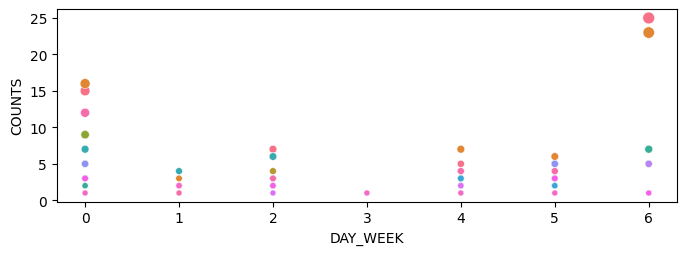

In [26]:
outliers_low_count = outliers_low.groupby(['INVERTER','DAY_WEEK'])\
                                 .count()\
                                 .rename(columns={'AC_POWER':'COUNTS'})\
                                 .COUNTS\
                                 .reset_index()
fig, ax = plt.subplots(figsize=(8,2.5))
sns.scatterplot(data=outliers_low_count,
                x='DAY_WEEK', y='COUNTS',
                hue='INVERTER', size='COUNTS', legend=False);

Jumlah **outlier** secara keseluruhan lebih banyak terjadi pada hari Senin. Kita bisa menduga bahwa setelah pemeliharaan pada hari Minggu, ada keterlambatan dalam mengaktifkan kembali semua sistem yang berlanjut hingga hari Senin. Saya rasa sekarang sudah ada cukup bukti untuk memutuskan untuk tetap mempertahankan **outlier** ini dalam data, karena ini bisa membantu model untuk memperhitungkan beberapa kondisi tersebut. Meskipun begitu, jumlahnya cukup rendah sehingga kemungkinan besar tidak akan berdampak terlalu besar pada hasil model.

Mari kita lihat dengan cepat **outlier** pada fitur lainnya, sebelum melanjutkan ke data yang hilang. Karena kita akan memeriksa beberapa fitur yang berbeda, kita bisa membuat sebuah fungsi untuk membantu mempercepat proses ini.

In [27]:
def outliers(df, feature, high_per, low_per, source_key=True):
    df = df.copy()
    df = df.merge(df.groupby('MINUTES_15')\
                  .quantile(low_per, numeric_only=True)[feature]\
                  .rename(f'OUTLIERS_LOW_{feature}'),
                  on='MINUTES_15',
                  how='left')
    df = df.merge(df.groupby('MINUTES_15')\
                  .quantile(high_per, numeric_only=True)[feature]\
                  .rename(f'OUTLIERS_HIGH_{feature}'),
                  on='MINUTES_15',
                  how='left')
    df = df.merge(df.groupby('MINUTES_15')\
                  .mean(numeric_only=True)[feature]\
                  .rename(f'MEAN_{feature}'),
                  on='MINUTES_15',
                  how='left')
    df = df.merge(df.groupby('MINUTES_15')\
                  .std(numeric_only=True)[feature]\
                  .rename(f'STD_{feature}'),
                  on='MINUTES_15',
                  how='left')
    df[f'STD_1_{feature}'] = df.query(f'{feature} < (MEAN_{feature} + STD_{feature}) \
                                      and {feature} > (MEAN_{feature} - STD_{feature})')[feature]

    fig, ax = plt.subplots()
    sns.color_palette("Paired")
    if source_key == True:
        sns.scatterplot(data=df,
                        y=feature, x='MINUTES_15',
                        hue='INVERTER', palette='gray', alpha=0.05, legend=False)
        sns.scatterplot(data=df,
                        y=f'STD_1_{feature}', x='MINUTES_15',
                        hue='INVERTER', palette='gray', alpha =0.5, legend=False)
        sns.scatterplot(data=df.query(f'{feature} > OUTLIERS_HIGH_{feature}'),
                        y=feature, x='MINUTES_15',
                        hue='INVERTER', size=feature)
        sns.scatterplot(data=df.query(f'{feature} < OUTLIERS_LOW_{feature}'),
                        y=feature, x='MINUTES_15',
                        hue='INVERTER', size= -df[feature])
    else:
        sns.scatterplot(data=df,
                        y=feature, x='MINUTES_15',
                        color='gray', alpha=0.05, legend=False)
        sns.scatterplot(data=df,
                        y=f'STD_1_{feature}', x='MINUTES_15',
                        color='gray', alpha =0.5, legend=False)
        sns.scatterplot(data=df.query(f'{feature} > OUTLIERS_HIGH_{feature}'),
                        y=feature, x='MINUTES_15',
                        color='blue', size=feature)
        sns.scatterplot(data=df.query(f'{feature} < OUTLIERS_LOW_{feature}'),
                        y=feature, x='MINUTES_15',
                        color='red', size= -df[feature])

    plt.title(f'{feature} per 15 minutes')
    plt.ylabel(f'{feature}')
    plt.xlabel('Hour of Day')
    ax.set_xticks([i for i in range(1, 97, 4)])
    ax.set_xticklabels([i for i in range(24)])
    ax.legend(['Full data', '+/- 1\u03C3', 'Outliers']);
    return ax, df

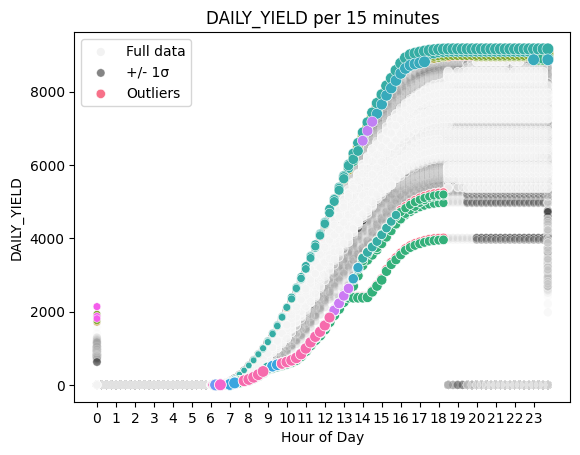

In [28]:
ax_daily_yield, df_daily_yield = outliers(df_eda[~df_eda.isna()], 'DAILY_YIELD', 0.99, 0.01);

Ada beberapa hal yang tidak biasa di sini, terutama angka 0 setelah jam 6 sore. Garis turun yang tajam di akhir hari dan garis lainnya di awal hari. Ini sepertinya bisa jadi data yang salah, atau mungkin semacam koreksi dari data sebelumnya. Apa pun penyebab pastinya, sebaiknya kita perbaiki ini agar data tidak terlalu terputus-putus dan pada akhirnya membantu model kita. Untuk memperbaikinya, kita akan setel setiap nilai selama malam hari menjadi hasil **yield** harian maksimum, dan atur semua hasil **yield** harian di awal hari menjadi 0.

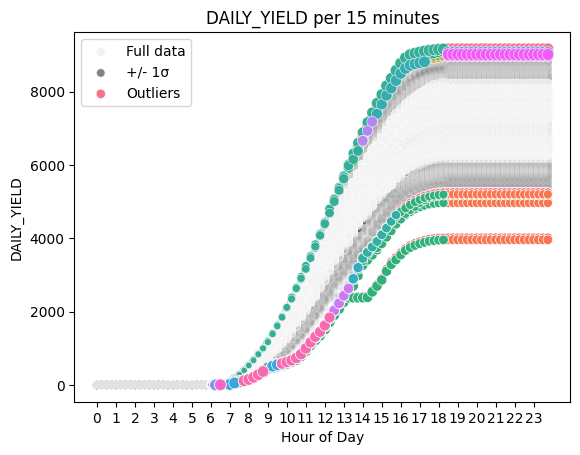

In [29]:
#Had a go through a few trys to settle on MINUTES_15 = 75 as a good starting point for night.
nighttime = [i for i in range(75,97)]
#Making these changes to the original df
df['DAILY_YIELD'] = df['DAILY_YIELD'].mask(df.HOUR.isin([0]), 0)
#We need a maximun daily yield for each inverter seperately
daily_yield = df.copy()
daily_yield = df.merge(pd.DataFrame({'DAILY_YIELD_DAY_MAX' : df.groupby([ 'INVERTER', 'DAY']).max()['DAILY_YIELD']})\
                       .reset_index(),
                       on=['INVERTER', 'DAY'],
                       how='right')
df['DAILY_YIELD'] = df['DAILY_YIELD'].mask(df.MINUTES_15.isin(nighttime),
                                           daily_yield['DAILY_YIELD_DAY_MAX'])

ax_daily_yield, df_daily_yield = outliers(df[~df.isna()], 'DAILY_YIELD', 0.99, 0.01);

Sekarang ini sudah lebih baik. Masih perlu dilihat seberapa besar pengaruh **daily yield** terhadap model kita, tapi setidaknya ini akan membantu sedikit.

### Missing Value

Sekarang kita siap untuk mengisi nilai yang hilang sebagai langkah terakhir sebelum memulai pemodelan. Pertama, mari kita cari bagian data yang hilang untuk digunakan sebagai kasus uji untuk melihat seberapa efektif pengisi nilai (**imputer**) kita.

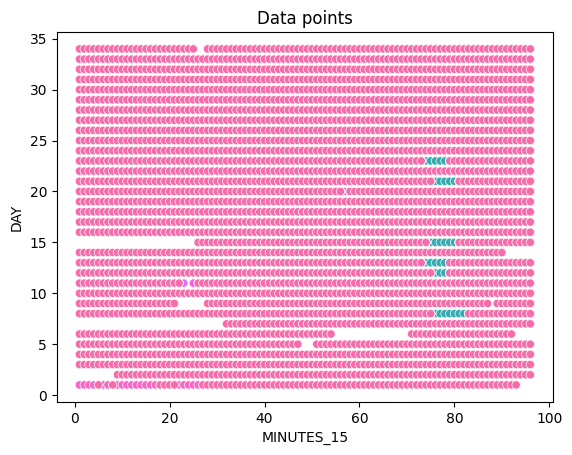

In [30]:
sns.scatterplot(data=df[~df.AC_POWER.isna()],
                x='MINUTES_15', y='DAY',
                hue='INVERTER', legend=False)
plt.title('Data points');

Ada cukup banyak data yang hilang pada hari ke-6, jadi kita bisa menggunakan hari ini untuk menguji **imputer** kita dengan plot perbandingan sebelum dan setelah pengisian nilai yang hilang.

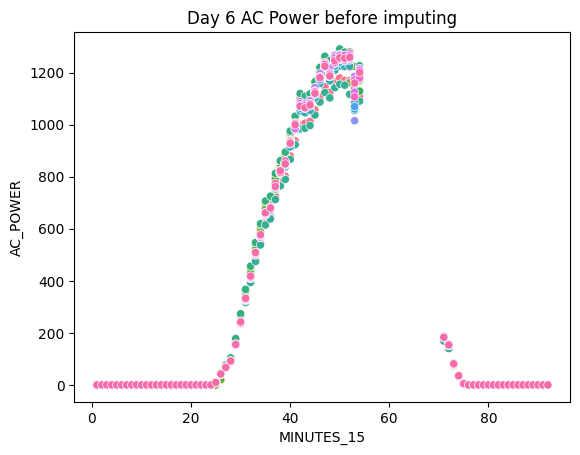

In [31]:
sns.scatterplot(data=df[~df.isna()][df.DAY == 6],
                x='MINUTES_15', y='AC_POWER',
                hue='INVERTER', legend=False);
plt.title('Day 6 AC Power before imputing');

Imputasi akan dilakukan menggunakan KNNImputer

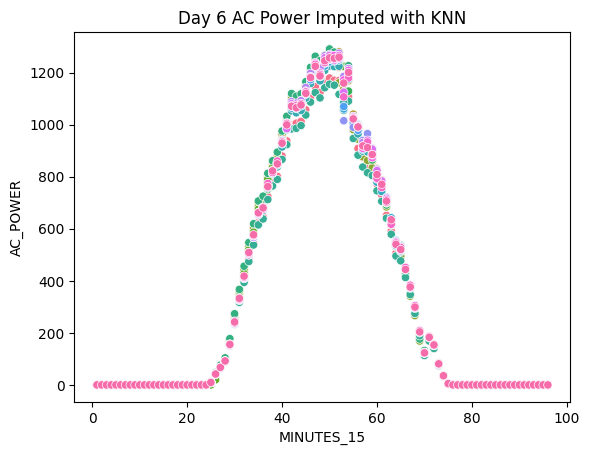

In [32]:
imputer = KNNImputer(n_neighbors=10)
inverter_dfs = []
inverter_df = None
for i in inverters:
    inverter_df = df[df.INVERTER == i]
    inverter_df.pop('INVERTER')
    inverter_df.index = inverter_df['DATE_TIME']
    datetime = inverter_df.pop('DATE_TIME')
    inverter_df = pd.DataFrame(imputer.fit_transform(inverter_df),
                               columns=inverter_df.columns,
                               index=datetime)
    inverter_df['INVERTER'] = i
    inverter_df = inverter_df.reset_index()
    inverter_dfs.append(inverter_df)
df_knn = pd.concat(inverter_dfs)

sns.scatterplot(data=df_knn[df_knn.DAY == 6],
                x='MINUTES_15', y='AC_POWER',
                hue='INVERTER', legend=False);
plt.title('Day 6 AC Power Imputed with KNN');

Karena KNNImputer bekerja dengan baik, maka kita akan membuat fungsi imputer nya

In [33]:
def imputer(df, imputer=KNNImputer(n_neighbors=10)):
    imputer = imputer
    inverter_dfs = []
    inverter_df = None
    for i in inverters:
        inverter_df = df[df.INVERTER == i]
        inverter_df.pop('INVERTER')
        inverter_df.index = inverter_df['DATE_TIME']
        datetime = inverter_df.pop('DATE_TIME')
        inverter_df = pd.DataFrame(imputer.fit_transform(inverter_df),
                                   columns=inverter_df.columns,
                                   index=datetime)
        inverter_df['INVERTER'] = i
        inverter_df = inverter_df.reset_index()
        inverter_dfs.append(inverter_df)
    df = pd.concat(inverter_dfs)
    return df

df = imputer(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71808 entries, 0 to 3263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            71808 non-null  datetime64[ns]
 1   DC_POWER             71808 non-null  float64       
 2   AC_POWER             71808 non-null  float64       
 3   DAILY_YIELD          71808 non-null  float64       
 4   TOTAL_YIELD          71808 non-null  float64       
 5   AMBIENT_TEMPERATURE  71808 non-null  float64       
 6   MODULE_TEMPERATURE   71808 non-null  float64       
 7   IRRADIATION          71808 non-null  float64       
 8   HOUR                 71808 non-null  float64       
 9   DAY                  71808 non-null  float64       
 10  DAY_WEEK             71808 non-null  float64       
 11  MINUTES_15           71808 non-null  float64       
 12  INVERTER             71808 non-null  object        
dtypes: datetime64[ns](1), float64(11), ob

### Target

Sebelum menetapkan baseline, kita perlu membuat target kita. Seperti yang disebutkan sebelumnya, target kita akan berupa jumlah pembangkit daya **AC** dari semua inverter untuk interval 15 menit tertentu yang diprediksi untuk hari berikutnya. Jadi, mari kita buat target tersebut dan periksalah lebih dekat sebelum menetapkan baseline.**bold text**

In [34]:
day = 96
#shifting to day ahead and dropping nulls cause by the shift
target = df.groupby('DATE_TIME').sum(numeric_only=True).AC_POWER.shift(-day)
target = target.dropna()

Melihat target kita selama satu minggu.

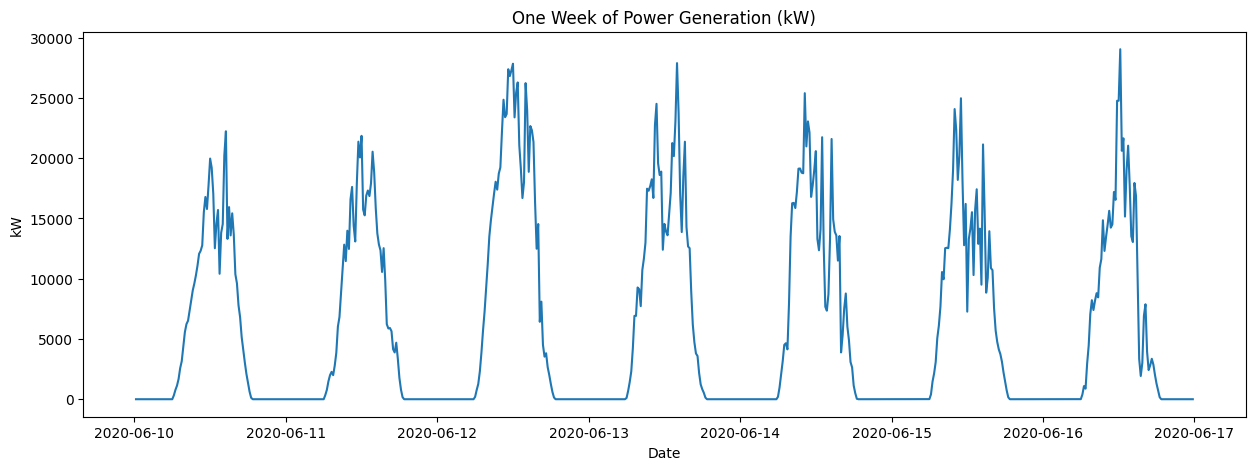

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(target[target.index > '2020-06-10'])
plt.title('One Week of Power Generation (kW)')
plt.xlabel('Date')
plt.ylabel('kW');

data yang ingin diprediksi (AC_POWER) memiliki fluktuasi yang signifikan, dengan banyak kenaikan dan penurunan tajam. Untuk menangani hal ini, salah satu pendekatannya adalah dengan memodelkan kinerja setiap inverter secara terpisah, atau dengan menggabungkan data dari semua inverter dalam satu model. Ini bisa membantu model untuk lebih baik menangkap pola yang berbeda antar inverter atau mengurangi variasi yang besar.

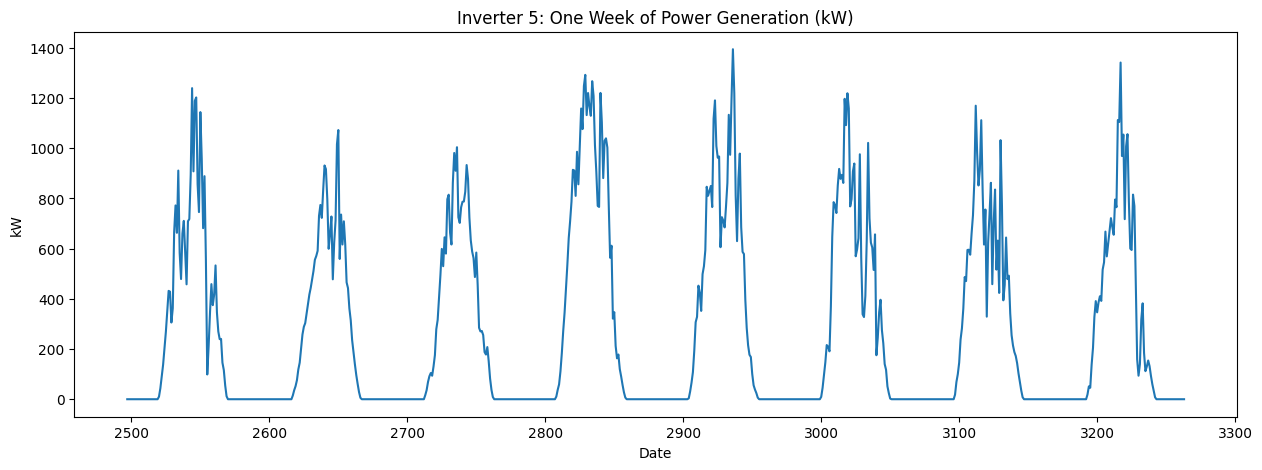

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(df[(df.INVERTER == inverters[5]) & (df.DATE_TIME > '2020-06-10')].AC_POWER)
plt.title('Inverter 5: One Week of Power Generation (kW)')
plt.xlabel('Date')
plt.ylabel('kW');

Namun, jika kita hanya melihat satu inverter, ternyata tidak ada perbedaan signifikan dalam meratakan data. Jadi, perbedaan antara memodelkan data inverter secara terpisah atau hanya menggabungkannya mungkin tidak terlalu besar. Bagaimanapun, kita akan mencoba kedua pendekatan tersebut untuk membandingkan hasilnya. Sekarang, mari kita lihat hasilnya berdasarkan jam.

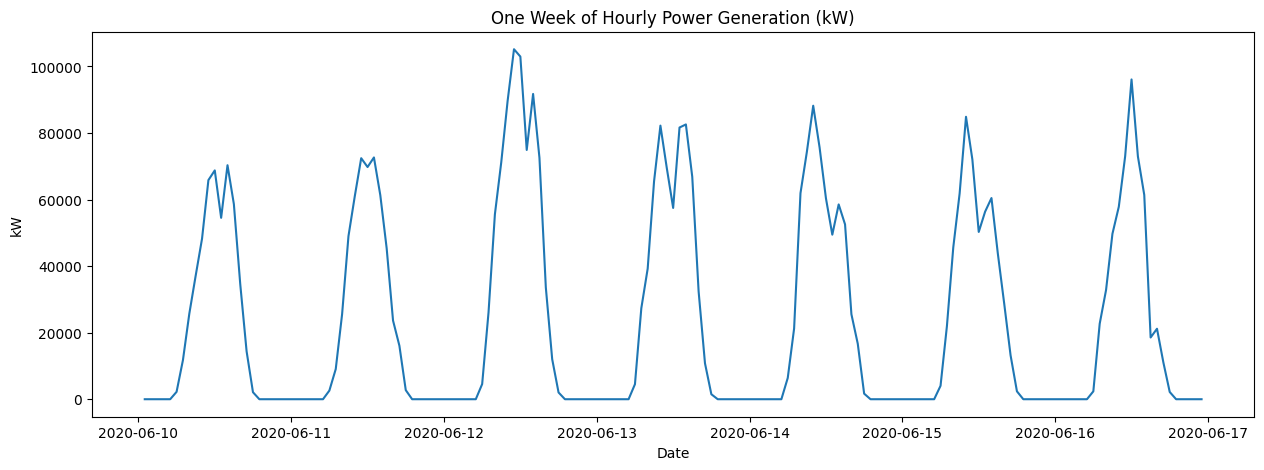

In [37]:
target_hour = target.resample('H').sum()

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(target_hour[target_hour.index > '2020-06-10'])
plt.title('One Week of Hourly Power Generation (kW)')
plt.xlabel('Date')
plt.ylabel('kW');

dengan meratakan data ke dalam rentang waktu yang lebih besar seperti per jam, data menjadi lebih stabil dan lebih mudah untuk dianalisis oleh model. Namun, meskipun kita melihat data per jam, tujuan akhirnya adalah memprediksi pembangkitan daya AC dalam interval 15 menit yang lebih detail.

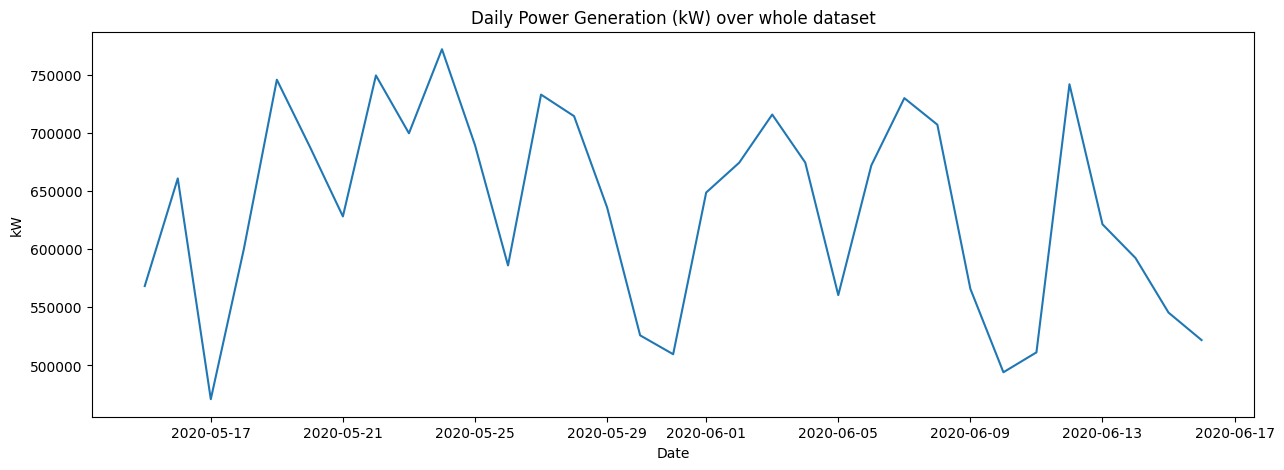

In [38]:
target_day = target.resample('D').sum()
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(target_day)
plt.title('Daily Power Generation (kW) over whole dataset')
plt.xlabel('Date')
plt.ylabel('kW');

Sepertinya ada tren jangka panjang dalam pembangkitan daya, mungkin karena pola cuaca. Kita akan mencoba menambahkan beberapa fitur yang bisa menangkap hal ini dalam model kita.

### Time series decomposition

Time series decomposition adalah proses untuk memecah data deret waktu (time series) menjadi komponen-komponen yang lebih sederhana, seperti tren (trend), musiman (seasonality), dan residual (noise). Tujuan dari dekomposisi ini adalah untuk memahami pola-pola dalam data yang lebih mendalam dan memisahkan komponen-komponen tersebut agar dapat dianalisis lebih lanjut.

Dibawah ini `seasonal_decompose` digunakan untuk mendekomposisi target (yang dalam hal ini kemungkinan adalah data pembangkitan daya) menjadi beberapa komponen:
1. **Trend**: Pola jangka panjang dalam data yang menggambarkan arah atau kecenderungan keseluruhan.
2. **Seasonality**: Pola musiman yang berulang, seperti fluktuasi daya yang dapat dipengaruhi oleh faktor-faktor tertentu, seperti waktu dalam sehari atau perubahan cuaca.
3. **Residual**: Sisa data yang tidak dapat dijelaskan oleh tren atau musiman, sering kali berisi noise atau fluktuasi yang tidak teratur.

Dengan mendekomposisi data menjadi komponen-komponen ini, kita bisa mendapatkan pemahaman lebih baik tentang pola yang ada dan menggunakan informasi ini untuk meningkatkan model prediksi.

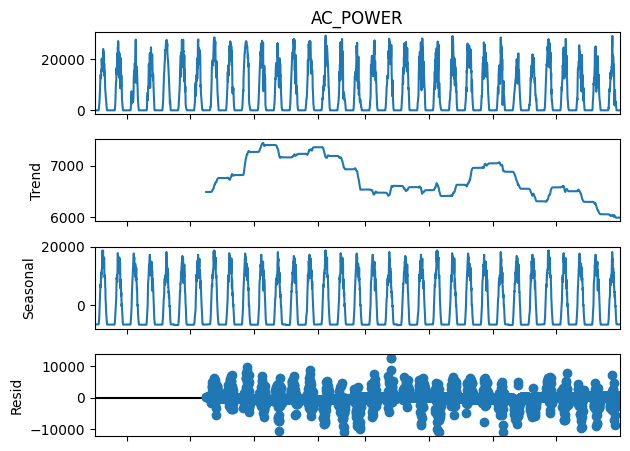

In [39]:
result_decompose=seasonal_decompose(target,
                                    model='additive',
                                    period=96*7,
                                    two_sided=False);
fig = result_decompose.plot()
fig.axes[0].set_xticklabels("")
fig.axes[1].set_xticklabels("")
fig.axes[2].set_xticklabels("")
fig.axes[3].set_xticklabels("");


Dekomposisi target kita berhasil menangkap beberapa tren dengan lebih baik. Pola harian terlihat jelas seperti yang diharapkan untuk data pembangkitan daya surya. Namun, plot residual menunjukkan banyak noise yang akan sulit ditangani oleh model. Mungkin fitur-fitur lain, seperti data cuaca, dapat membantu mengurangi noise ini.

Sekarang kita siap untuk menentukan baseline. Baseline kita adalah menganggap bahwa pembangkitan daya pada interval 15 menit yang sama pada hari sebelumnya akan terjadi lagi pada hari yang akan datang. Kita akan menggunakan root mean squared error (RMSE) sebagai ukuran kinerja model dan menyisihkan 4 hari terakhir data untuk pengujian antar model. Dengan cara ini, kita memiliki 3 hari yang tersisa untuk bekerja karena kita memprediksi untuk satu hari ke depan. RMSE digunakan untuk memberikan penalti lebih besar pada kesalahan besar (karena kesalahan dikuadratkan dalam perhitungan). RMSE juga memberikan skor dalam satuan yang sama dengan target kita (kW). Semakin kecil skor, semakin baik modelnya.

In [40]:
day = 96
#last 3 days for testing and the rest for training
target_test = target[-3*day:]
target_train = target[:-3*day]
#moving target back a day
baseline_preds = target.shift(day)[-3*day:]
baseline_score = np.round(mean_squared_error(target_test,
                                             baseline_preds,
                                             squared=False),
                          4)
print('baseline_score: ', baseline_score)

baseline_score:  3699.306


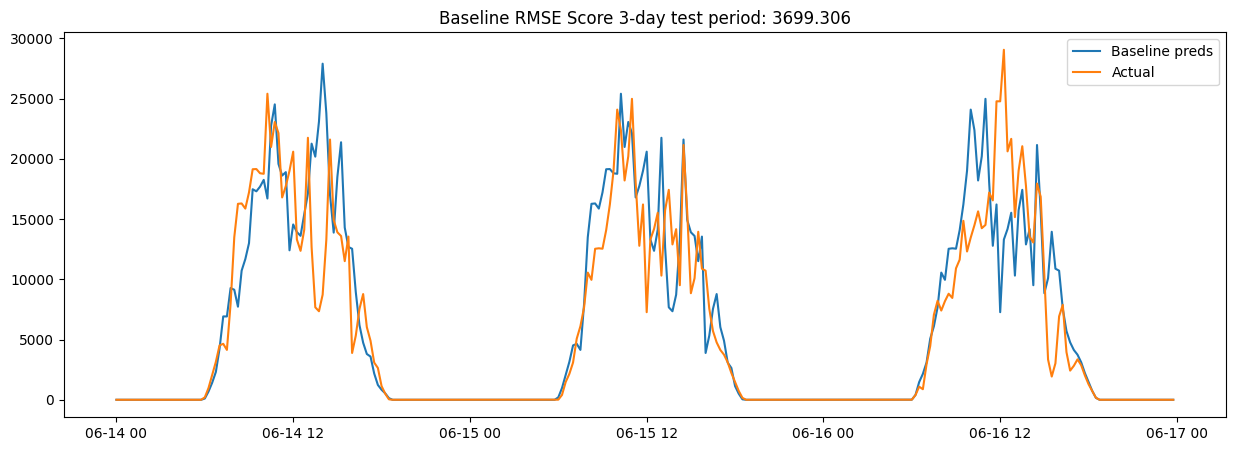

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
# plt.plot(X[X.index > '2020-06-10'].index, y_pred[X.index > '2020-06-10'], alpha=0.5)
plt.plot(baseline_preds, label='baseline')
plt.plot(target_test);
plt.title(f'Baseline RMSE Score 3-day test period: {baseline_score}')
plt.legend(['Baseline preds', 'Actual']);

Skor baseline yang dihasilkan adalah 3699 kW. Skor ini menunjukkan kesalahan rata-rata antara nilai yang diprediksi menggunakan data dari hari sebelumnya dan nilai yang sebenarnya. Meskipun tampaknya cukup tinggi, ini masih bisa dianggap sebagai hasil yang cukup baik karena dapat mencakup beberapa pola dengan cukup akurat.
Kemungkinan besar, data dari hari sebelumnya akan berperan penting dalam model kita, karena hasil baseline sudah menunjukkan adanya pola yang bisa diprediksi dari data sebelumnya.

### Pengaruh Cuaca

Selama ini, semua data dari inverter dimasukkan dalam satu kolom, dengan data setiap inverter berada di baris terpisah. Namun, untuk pemodelan, kita harus mengagregasi dataframe berdasarkan waktu dan menjadikannya sebagai index. Ini menimbulkan pertanyaan tentang bagaimana menangani data inverter. Kita bisa:

- Mengagregasi data dari semua inverter (misalnya dengan menjumlahkan daya), yang menyederhanakan dataframe, tetapi mungkin kehilangan informasi penting dari perbedaan kinerja antar inverter.
- Memutar data inverter menjadi fitur baru di dataframe, yang akan membuat dataframe lebih kompleks tetapi memungkinkan model untuk memahami perbedaan antar inverter.

Selain itu, kita juga akan melihat bagaimana data cuaca mempengaruhi kinerja model. Data cuaca seperti suhu dan sinar matahari bisa mempengaruhi pembangkit daya surya dan meningkatkan akurasi model jika dimasukkan.

In [42]:
generation = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
weather = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
all_features = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
                'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
#Aggregating data across inverters. We will sum the generation data and take the mean of the weather data.
#Also, adding back basic datetime features
df_agg = pd.concat([df.groupby('DATE_TIME')[generation].sum(numeric_only=True),
                    df.groupby('DATE_TIME').mean(numeric_only=True)[weather]], axis=1)

df_agg['HOUR'] = df_agg.index.hour
df_agg['DAY'] = df_agg.index.dayofyear
df_agg['DAY_WEEK'] = df_agg.index.dayofweek
df_agg['MINUTES_15'] = df_agg.index.time

#This maps the 15 minute intervals over the course of the day to ints 1-96.
df_agg['MINUTES_15'] = df_agg.MINUTES_15.map({df_agg.MINUTES_15.unique()[i-1]:i for i in range(1, 97)})
#Change day of year to day of data
df_agg['DAY'] = df_agg.DAY.map({df_agg.DAY.unique()[i-1]:i for i in range(1, 35)})
#Pivoting inverter generation data as features and adding back datetime features
inverter_dfs = []
for i in inverters:
    df_inverter = df[df.INVERTER == i][['INVERTER', 'DATE_TIME', 'AC_POWER',
                                        'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']]
    df_inverter.pop('INVERTER')
    date_time = df_inverter.pop('DATE_TIME')
    df_inverter.index = date_time
    df_inverter.columns += f'_{i}'
    inverter_dfs.append(df_inverter)

df_sep = pd.concat(inverter_dfs, axis=1, ignore_index=False)
df_sep = pd.concat([df_sep, df_agg], axis=1)

all_features_seperated = list(df_sep.columns)

#Without the weather data
df_agg_no_weather = df_agg.drop(weather, axis=1)
df_sep_no_weather = df_sep.drop(weather, axis=1)

#For deep learning model
df_agg_dl = df_agg.copy()
df_sep_dl = df_sep.copy()

Pada kode diatas data pembangkit daya surya dan cuaca digabungkan dan diproses menjadi beberapa format untuk analisis lebih lanjut. Data pembangkit daya dari setiap inverter dijumlahkan (AC_POWER, DC_POWER, dll.) dan data cuaca dirata-ratakan. Fitur waktu seperti jam, hari, dan interval 15 menit juga ditambahkan. Data inverter dipisahkan menjadi fitur individu per inverter dan digabungkan dengan data agregat. Kemudian, dua versi dataframe dibuat: satu dengan data cuaca dan satu tanpa cuaca, untuk eksperimen lebih lanjut, termasuk model deep learning.








## Model

In [43]:
#removing features (besides basic datetime ones)
df_agg = df_agg_dl
df_sep = df_sep_dl
day = 96
tscv = TimeSeriesSplit(test_size=day, n_splits=29, max_train_size=4*day)
cv_indices = []
#since all our inverter splits share the same index we'll just choose df_agg
for train_indices, test_indices in tscv.split(df_agg.iloc[:-day*4]):
    cv_indices.append((train_indices, test_indices))

In [44]:
import tensorflow as tf

### df_sep full data including weather
inputs_sep_trains = []
labels_sep_trains = []
for i in range(3, len(cv_indices)-4):
    input_sep_train = (df_sep.iloc[cv_indices[i][0]] - df_sep.iloc[cv_indices[i][0]].mean()) \
                       / df_sep.iloc[cv_indices[i][0]].std()
    label_sep_train = (target.iloc[cv_indices[i][1]] - target.iloc[cv_indices[i][1]].mean()) \
                       / target.iloc[cv_indices[i][1]].std()
    label_sep_train = pd.DataFrame(label_sep_train, columns=['AC_POWER'])
    inputs_sep_trains.append(input_sep_train)
    labels_sep_trains.append(label_sep_train)

inputs_sep_train_stack = tf.stack(inputs_sep_trains)
labels_sep_train_stack = tf.stack(labels_sep_trains)

inputs_sep_vals = []
labels_sep_vals = []
for i in range(len(cv_indices)-4 , len(cv_indices)):
    input_sep_val = (df_sep.iloc[cv_indices[i][0]] - df_sep.iloc[cv_indices[i][0]].mean()) \
                     / df_sep.iloc[cv_indices[i][0]].std()
    label_sep_val = (target.iloc[cv_indices[i][1]] - target.iloc[cv_indices[i][1]].mean()) \
                     / target.iloc[cv_indices[i][1]].std()
    label_sep_val = pd.DataFrame(label_sep_val, columns=['AC_POWER'])
    inputs_sep_vals.append(input_sep_val)
    labels_sep_vals.append(label_sep_val)

inputs_sep_val_stack = tf.stack(inputs_sep_vals)
labels_sep_val_stack = tf.stack(labels_sep_vals)

val = (inputs_sep_val_stack, labels_sep_val_stack)


In [45]:
### Multi output sep
MAX_EPOCHS = 2000

sep_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(96*1,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([96, 1])
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=20,
                                                    mode='min',
                                                    restore_best_weights=True)

sep_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = sep_model.fit(x=inputs_sep_train_stack, y=labels_sep_train_stack, epochs=MAX_EPOCHS,
                    validation_data=val,
                    callbacks=[early_stopping],
                    verbose=0);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


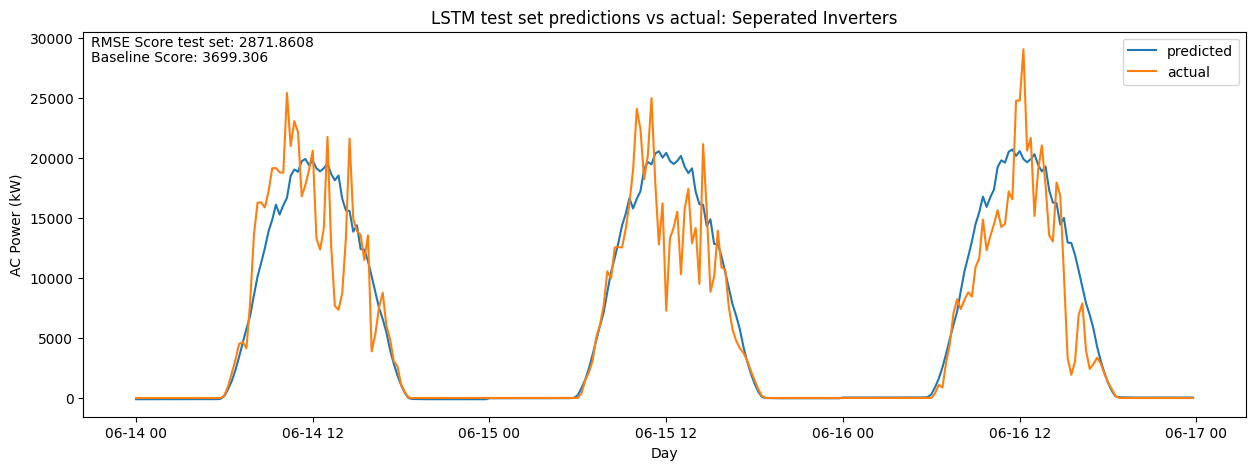

In [46]:
day_1_labels = target.iloc[-day*3:-day*2]
day_2_labels = target.iloc[-day*2:-day*1]
day_3_labels = target.iloc[-day:]

test_labels = [day_1_labels, day_2_labels, day_3_labels]
test_labels_stack = tf.stack(test_labels)

day_1_inputs = (df_sep.iloc[-day*7:-day*3] - df_sep.iloc[-day*7:-day*3].mean()) \
                / df_sep.iloc[-day*7:-day*3].std()
day_2_inputs = (df_sep.iloc[-day*6:-day*2] - df_sep.iloc[-day*6:-day*2].mean()) \
                / df_sep.iloc[-day*6:-day*2].std()
day_3_inputs = (df_sep.iloc[-day*5:-day] - df_sep.iloc[-day*5:-day].mean()) \
                / df_sep.iloc[-day*5:-day].std()

test_inputs = [day_1_inputs, day_2_inputs, day_3_inputs]
test_inputs_stack = tf.stack(test_inputs)

target_norm_preds = sep_model.predict(test_inputs_stack)

labels_preds_day_1 = target_norm_preds[0] * df_sep.iloc[-day*7:-day*3].AC_POWER.std() \
                     + df_sep.iloc[-day*7:-day*3].AC_POWER.mean()
labels_preds_day_2 = target_norm_preds[1] * df_sep.iloc[-day*6:-day*2].AC_POWER.std() \
                     + df_sep.iloc[-day*6:-day*2].AC_POWER.mean()
labels_preds_day_3 = target_norm_preds[2] * df_sep.iloc[-day*5:-day].AC_POWER.std() \
                     + df_sep.iloc[-day*5:-day].AC_POWER.mean()

day_1_error = mean_squared_error(test_labels_stack[0],
                                 labels_preds_day_1,
                                 squared=False)
day_2_error = mean_squared_error(test_labels_stack[1],
                                 labels_preds_day_2,
                                 squared=False)
day_3_error = mean_squared_error(test_labels_stack[2],
                                 labels_preds_day_3,
                                 squared=False)
lstm_rsme_score_test_set = np.round((day_1_error + day_2_error + day_3_error) / 3, 4)

labels_preds = np.concatenate([labels_preds_day_1,
                               labels_preds_day_2,
                               labels_preds_day_3],
                              axis = None)
test_labels = np.concatenate([test_labels_stack[0],
                              test_labels_stack[1],
                              test_labels_stack[2]],
                             axis = None)

lstm_best = {'best_score':lstm_rsme_score_test_set}

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(target.iloc[-3*day:].index, labels_preds)
plt.plot(target.iloc[-3*day:].index, test_labels)
plt.figtext(.13, .85, s=f'RMSE Score test set: {lstm_rsme_score_test_set}')
plt.figtext(.13, .82, s=f'Baseline Score: {baseline_score}')
plt.title('LSTM test set predictions vs actual: Seperated Inverters')
plt.legend(['predicted', 'actual'])
plt.ylabel('AC Power (kW)')
plt.xlabel('Day');

Tanpa penyesuaian apapun, model ini sudah baik. Sekarang, mari kita latih dengan data inverter yang digabungkan.

In [47]:
### df_agg full data including weather
inputs_agg_trains = []
labels_agg_trains = []
for i in range(3, len(cv_indices)-4):
    input_agg_train = (df_agg.iloc[cv_indices[i][0]] - df_agg.iloc[cv_indices[i][0]].mean()) \
                        / df_agg.iloc[cv_indices[i][0]].std()
    label_agg_train = (target.iloc[cv_indices[i][1]] - target.iloc[cv_indices[i][1]].mean()) \
                        / target.iloc[cv_indices[i][1]].std()
    label_agg_train = pd.DataFrame(label_sep_train, columns=['AC_POWER'])
    inputs_agg_trains.append(input_agg_train)
    labels_agg_trains.append(label_agg_train)

inputs_agg_train_stack = tf.stack(inputs_agg_trains)
labels_agg_train_stack = tf.stack(labels_agg_trains)

inputs_agg_vals = []
labels_agg_vals = []
for i in range(len(cv_indices)-4 , len(cv_indices)):
    input_agg_val = (df_agg.iloc[cv_indices[i][0]] - df_agg.iloc[cv_indices[i][0]].mean()) \
                     / df_agg.iloc[cv_indices[i][0]].std()
    label_agg_val = (target.iloc[cv_indices[i][1]] - target.iloc[cv_indices[i][1]].mean()) \
                     / target.iloc[cv_indices[i][1]].std()
    label_agg_val = pd.DataFrame(label_sep_val, columns=['AC_POWER'])
    inputs_agg_vals.append(input_agg_val)
    labels_agg_vals.append(label_agg_val)

inputs_agg_val_stack = tf.stack(inputs_agg_vals)
labels_agg_val_stack = tf.stack(labels_agg_vals)

val = (inputs_agg_val_stack, labels_agg_val_stack)

In [48]:
### Multi output agg
MAX_EPOCHS = 2000

agg_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(16, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(96*1,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([96, 1])
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=20,
                                                    mode='min',
                                                    restore_best_weights=True)

agg_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = agg_model.fit(x=inputs_agg_train_stack, y=labels_agg_train_stack, epochs=MAX_EPOCHS,
                    validation_data=val,
                    callbacks=[early_stopping],
                    verbose=0);


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


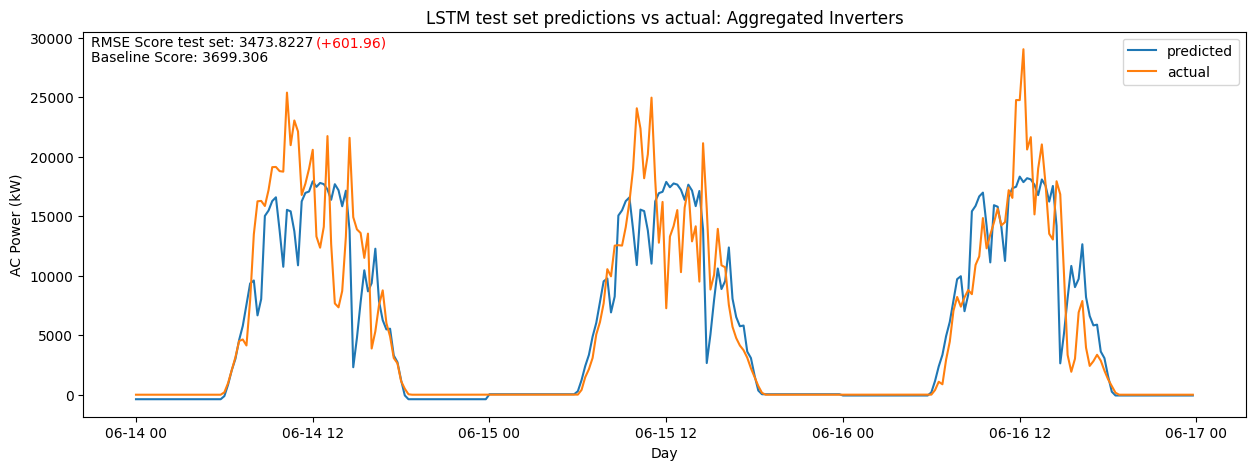

In [49]:
day_1_labels = target.iloc[-day*3:-day*2]
day_2_labels = target.iloc[-day*2:-day*1]
day_3_labels = target.iloc[-day:]

test_labels = [day_1_labels, day_2_labels, day_3_labels]
test_labels_stack = tf.stack(test_labels)

day_1_inputs = (df_agg.iloc[-day*7:-day*3] - df_agg.iloc[-day*7:-day*3].mean()) \
                / df_agg.iloc[-day*7:-day*3].std()
day_2_inputs = (df_agg.iloc[-day*6:-day*2] - df_agg.iloc[-day*6:-day*2].mean()) \
                / df_agg.iloc[-day*6:-day*2].std()
day_3_inputs = (df_agg.iloc[-day*5:-day] - df_agg.iloc[-day*5:-day].mean()) \
                / df_agg.iloc[-day*5:-day].std()

test_inputs = [day_1_inputs, day_2_inputs, day_3_inputs]
test_inputs_stack = tf.stack(test_inputs)

target_norm_preds = agg_model.predict(test_inputs_stack)

labels_preds_day_1 = target_norm_preds[0] * df_agg.iloc[-day*7:-day*3].AC_POWER.std() \
                     + df_agg.iloc[-day*7:-day*3].AC_POWER.mean()
labels_preds_day_2 = target_norm_preds[1] * df_agg.iloc[-day*6:-day*2].AC_POWER.std() \
                     + df_agg.iloc[-day*6:-day*2].AC_POWER.mean()
labels_preds_day_3 = target_norm_preds[2] * df_agg.iloc[-day*5:-day].AC_POWER.std() \
                     + df_agg.iloc[-day*5:-day].AC_POWER.mean()

day_1_error = mean_squared_error(test_labels_stack[0],
                                 labels_preds_day_1,
                                 squared=False)
day_2_error = mean_squared_error(test_labels_stack[1],
                                 labels_preds_day_2,
                                 squared=False)
day_3_error = mean_squared_error(test_labels_stack[2],
                                 labels_preds_day_3,
                                 squared=False)
lstm_rsme_score_test_set = np.round((day_1_error + day_2_error + day_3_error) / 3, 4)

labels_preds = np.concatenate([labels_preds_day_1,
                               labels_preds_day_2,
                               labels_preds_day_3],
                              axis = None)
test_labels = np.concatenate([test_labels_stack[0],
                              test_labels_stack[1],
                              test_labels_stack[2]],
                             axis = None)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(target.iloc[-3*day:].index, labels_preds)
plt.plot(target.iloc[-3*day:].index, test_labels)
plt.figtext(.13, .85, s=f'RMSE Score test set: {lstm_rsme_score_test_set}')

best_score = lstm_best['best_score']
lstm_score_difference = np.round(lstm_rsme_score_test_set - best_score, 2)
if (lstm_score_difference) < 0:
    plt.figtext(.28, .85, s=f'({lstm_score_difference}) New Best', color='green')
    lstm_best.update({'best_score': lstm_rsme_score_test_set})
elif (lstm_score_difference) == 0:
    plt.figtext(.28, .85, s=f'({lstm_score_difference})')
elif (lstm_score_difference) > 0:
    plt.figtext(.28, .85, s=f'(+{lstm_score_difference})', color='red')

plt.figtext(.13, .82, s=f'Baseline Score: {baseline_score}')
plt.title('LSTM test set predictions vs actual: Aggregated Inverters')
plt.legend(['predicted', 'actual'])
plt.ylabel('AC Power (kW)')
plt.xlabel('Day');

### Evaluasi

Hasil RMSE menunjukkan bahwa model separated lebih baik dari pada model Aggregation